In [1]:
import tensorflow as tf
import os

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)

In [2]:
strategy = tf.distribute.TPUStrategy(resolver)

In [3]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 16491, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 16491 (delta 27), reused 36 (delta 9), pack-reused 16408
Receiving objects: 100% (16491/16491), 15.11 MiB | 13.11 MiB/s, done.
Resolving deltas: 100% (11292/11292), done.


In [4]:
%cd yolov5
%pwd

/content/yolov5


'/content/yolov5'

In [5]:
!pip install -qr requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 716.2/716.2 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.9 MB/s eta 0:00:00


In [6]:
%cd ..
%pwd

/content


'/content'

In [7]:
%mkdir maskYolo
%cd maskYolo

/content/maskYolo


https://public.roboflow.com/object-detection/pothole  


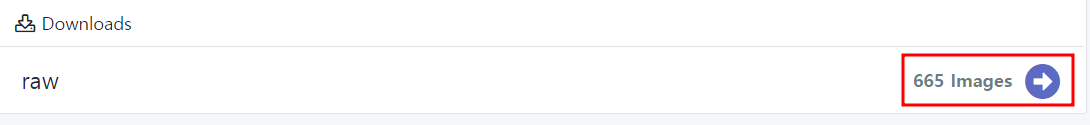

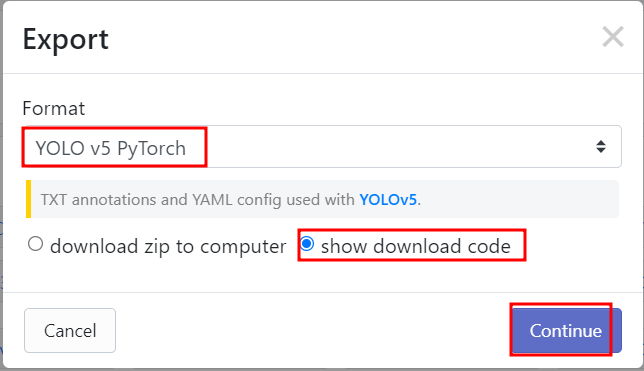

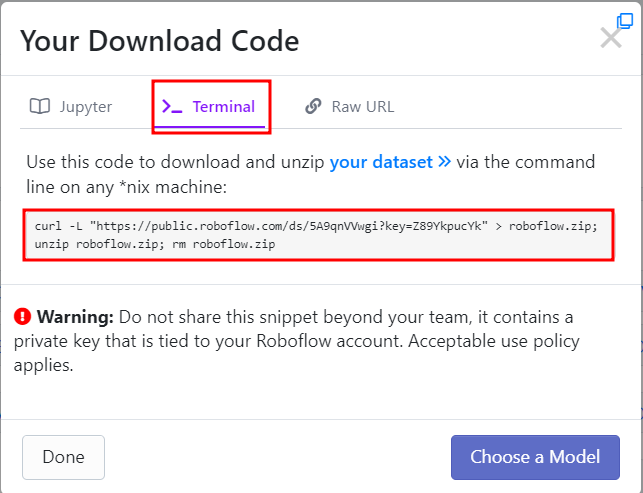

In [8]:
!curl -L "https://public.roboflow.com/ds/5A9qnVVwgi?key=Z89YkpucYk" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   910  100   910    0     0   3428      0 --:--:-- --:--:-- --:--:--  3421
100 46.0M  100 46.0M    0     0  49.2M      0 --:--:-- --:--:-- --:--:-- 49.2M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/img-105_jpg.rf.3fe9dff3d1631e79ecb480ff403bcb86.jpg  
 extracting: test/images/img-107_jpg.rf.2e40485785f6e5e2efec404301b235c2.jpg  
 extracting: test/images/img-146_jpg.rf.61be25b3053a51f622a244980545df2b.jpg  
 extracting: test/images/img-161_jpg.rf.211541e7178a4a93ec0680f26b905427.jpg  
 extracting: test/images/img-168_jpg.rf.af3590e07b06b43e91fa53990ff94af3.jpg  
 extracting: test/images/img-179_jpg.rf.8632eb0d9b75fefe144829e67b75015a.jpg  
 extracting: test/images/img

In [9]:
### 야물정보값 변경_ 다른방법도 많음 _ 2번 포트홀 자료로 확인
import yaml
folder='maskYolo'
with open('/content/' + folder + '/data.yaml', 'r') as f:
  data=yaml.load(f,Loader=yaml.FullLoader)
  print('▶ 원래  yaml 자료')
  print(data)


  data['train']='/content/' + folder + '/'
  data['test']='/content/' + folder + '/'
  data['val']='/content/' + folder + '/'

  with open('/content/' + folder + '/data.yaml','w') as f:
    yaml.dump(data,f)

  print('▶ 수정된 yaml')
  print(data)

▶ 원래  yaml 자료
{'train': '../train/images', 'val': '../valid/images', 'nc': 1, 'names': ['pothole']}
▶ 수정된 yaml
{'train': '/content/maskYolo/', 'val': '/content/maskYolo/', 'nc': 1, 'names': ['pothole'], 'test': '/content/maskYolo/'}


In [10]:
%cd ../yolov5

/content/yolov5


In [12]:
!python train.py --img 416 --batch 16 --epochs 5 --data /content/maskYolo/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name maskYoloResult

train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=/content/maskYolo/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=5, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=maskYoloResult, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-287-g574331f9 Python-3.10.12 torch-2.1.0+cu121 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cl

In [13]:
weights_path='/content/yolov5/runs/train/maskYoloResult/weigths/best.pt'

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd ..

In [19]:
!unzip -qq '/content/drive/MyDrive/sesac/욜로_마스크.zip'

In [22]:
%cd yolov5

/content/yolov5


In [24]:
!python detect.py --weights '/content/yolov5/runs/train/maskYoloResult/weights/best.pt'  --img 416 --conf 0.3 --source /content/potholes_video.mp4

detect: weights=['/content/yolov5/runs/train/maskYoloResult/weights/best.pt'], source=/content/potholes_video.mp4, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-287-g574331f9 Python-3.10.12 torch-2.1.0+cu121 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/1738) /content/potholes_video.mp4: 256x416 (no detections), 126.3ms
video 1/1 (2/1738) /content/potholes_video.mp4: 256x416 (no detections), 129.8ms
video 1/1 (3/1738) /content/potholes_video.mp4: 256x416 (no detections), 126.4ms
video 1/1 (4/1738) /content/potholes_video.mp4: 256x416 (no detections), 1